In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [2]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

In [9]:
result = []

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  result.append([name, acc, prec, rec, f1])

In [11]:
comparison_df = pd.DataFrame(
    result,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.956140   0.945946  0.985915  0.965517
1        Decision Tree  0.947368   0.957746  0.957746  0.957746
2        Random Forest  0.964912   0.958904  0.985915  0.972222
3                  SVM  0.947368   0.922078  1.000000  0.959459


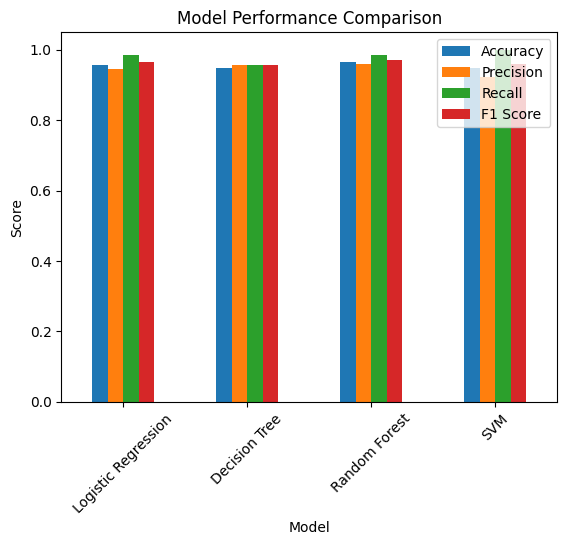

In [12]:
comparison_df.set_index("Model").plot(kind="bar")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [13]:
best_model_name = comparison_df.sort_values(by="F1 Score", ascending=False).iloc[0]["Model"]
print("Best Model:", best_model_name)

Best Model: Random Forest


In [14]:
best_model = models[best_model_name]
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']